=====================================================================
# <font size = 5 color='Black'><u>Vehicle Performance Prediction using Linear Regression<u> 
=====================================================================

## Abstract

Most players in the automotive sector are investing in ML for their marketing efforts, a
much smaller group is putting in place incentives and key performance indicators 
(KPIs) to use more ML and automation. Closing the gap requires a stronger commitment 
to developing ML capability that is not just useful but also used.

## Problem Statement

Use regression analysis to predict vehicle performance (mileage i.e kilometre travelled 
per litre)

## Data Description

Kilometer_per_liter -> distance in kilometre travelled per litre(mileage)

cylinders ->  No of cylinders

displacement ->  displacement

horsepower ->  A horsepower is a unit of measurement of power, or the rate at 
which work is done, usually in reference to the output of 
engines or motors

weight -> Weight of car

acceleration -> Acceleration of Car

model ->  year Model Year of the car

origin ->  Country origin

car -> name Car brand and model name (unique for each instance

=====================================================================

### Importing Necessary Libraries

In [ ]:
#to hide warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
#for working with arrays
import numpy as np
#for reading data and other manipulations
import pandas as pd
#for visulaization
import matplotlib.pyplot as plt
import seaborn as sns
#for encoding categorical variables
from sklearn.preprocessing import LabelEncoder
#for scaling the data
from sklearn.preprocessing import StandardScaler
#for splitting the data into train set ans test set
from sklearn.model_selection import train_test_split
#for performing Linear regression and other regularization techniques
from sklearn.linear_model import LinearRegression,Ridge,Lasso
#for model evaluation
from sklearn.metrics import r2_score, mean_squared_error

### Reading data 

In [3]:
#Creating a dataframe
data = pd.read_csv(r"C:\Users\shree\Desktop\bhavika ml\LinearRegression_SGD\Dataset\data.csv",header = 0,delimiter = ' *, *')

In [4]:
#to check the sample data
data.head()

,origin,cylinders,displacement,horsepower,weight,acceleration,year,name,Kilometer_per_liter
0,1,8,307.0,130,3504,12.0,1970,chevrolet chevelle malibu,7.652587
1,1,8,350.0,165,3693,11.5,1970,buick skylark 320,6.377156
2,1,8,318.0,150,3436,11.0,1970,plymouth satellite,7.652587
3,1,8,304.0,150,3433,12.0,1970,amc rebel sst,6.802299
4,1,8,302.0,140,3449,10.5,1970,ford torino,7.227443


### Understanding the data

In [5]:
data.shape

(398, 9)

Data has 398 observation and 9 columns out of which 1 column has Dependent variable and other 8 are Independent var

In [6]:
data.columns

Index(['origin', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'year', 'name', 'Kilometer_per_liter'],
      dtype='object')

In [7]:
data.dtypes

origin                   int64
cylinders                int64
displacement           float64
horsepower              object
weight                   int64
acceleration           float64
year                     int64
name                    object
Kilometer_per_liter    float64
dtype: object

'horsepower' and 'name' are categorical variables. But horsepower cannot be categorical that means it contains some invalid characters Others are either continuous or discrete var

Considering domain understanding, origin,cylinders and year are discrete var

In [8]:
#to get insights from data by looking at their mean,std etc.,
data.describe()

,origin,cylinders,displacement,weight,acceleration,year,Kilometer_per_liter
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,1.572864,5.454774,193.425879,2970.424623,15.568090,1976.010050,9.997073
std,0.802055,1.701004,104.269838,846.841774,2.757689,3.697627,3.322917
min,1.000000,3.000000,68.000000,1613.000000,8.000000,1970.000000,3.826293
25%,1.000000,4.000000,104.250000,2223.750000,13.825000,1973.000000,7.440015
50%,1.000000,4.000000,148.500000,2803.500000,15.500000,1976.000000,9.778305
75%,2.000000,8.000000,262.000000,3608.000000,17.175000,1979.000000,12.329168
max,3.000000,8.000000,455.000000,5140.000000,24.800000,1982.000000,19.811697


In [9]:
# to check for the unique values in year variable(can be used while encoding)
data['year'].unique()

array([1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980,
       1981, 1982], dtype=int64)

In [10]:
# to check for the unique values in name variable
data['name'].unique()

array(['chevrolet chevelle malibu', 'buick skylark 320',
       'plymouth satellite', 'amc rebel sst', 'ford torino',
       'ford galaxie 500', 'chevrolet impala', 'plymouth fury iii',
       'pontiac catalina', 'amc ambassador dpl', 'dodge challenger se',
       "plymouth 'cuda 340", 'chevrolet monte carlo',
       'buick estate wagon (sw)', 'toyota corona mark ii',
       'plymouth duster', 'amc hornet', 'ford maverick', 'datsun pl510',
       'volkswagen 1131 deluxe sedan', 'peugeot 504', 'audi 100 ls',
       'saab 99e', 'bmw 2002', 'amc gremlin', 'ford f250', 'chevy c20',
       'dodge d200', 'hi 1200d', 'chevrolet vega 2300', 'toyota corona',
       'ford pinto', 'plymouth satellite custom', 'ford torino 500',
       'amc matador', 'pontiac catalina brougham', 'dodge monaco (sw)',
       'ford country squire (sw)', 'pontiac safari (sw)',
       'amc hornet sportabout (sw)', 'chevrolet vega (sw)',
       'pontiac firebird', 'ford mustang', 'mercury capri 2000',
       'opel 1900'

In [11]:
# to check for the invalid character in horsepower
data['horsepower'].unique()

array(['130', '165', '150', '140', '198', '220', '215', '225', '190',
       '170', '160', '95', '97', '85', '88', '46', '87', '90', '113',
       '200', '210', '193', '?', '100', '105', '175', '153', '180', '110',
       '72', '86', '70', '76', '65', '69', '60', '80', '54', '208', '155',
       '112', '92', '145', '137', '158', '167', '94', '107', '230', '49',
       '75', '91', '122', '67', '83', '78', '52', '61', '93', '148',
       '129', '96', '71', '98', '115', '53', '81', '79', '120', '152',
       '102', '108', '68', '58', '149', '89', '63', '48', '66', '139',
       '103', '125', '133', '138', '135', '142', '77', '62', '132', '84',
       '64', '74', '116', '82'], dtype=object)

We can see a '?' in the array that means missing value is being represented as '?'

### Data Preprocessing

# <font size = 3 color='Black'><b>1). Handling Missing Values</b>

In [12]:
#Check for missing values count in whole dataset
data.isnull().sum()

origin                 0
cylinders              0
displacement           0
horsepower             0
weight                 0
acceleration           0
year                   0
name                   0
Kilometer_per_liter    0
dtype: int64

We can see 0 missing values but that's not true as it is represented by '?'

So we first need to convert '?' to NaN(value that is identified by python as missing val)

In [13]:
data = data.replace('?',np.nan)

In [14]:
data.isnull().sum()

origin                 0
cylinders              0
displacement           0
horsepower             6
weight                 0
acceleration           0
year                   0
name                   0
Kilometer_per_liter    0
dtype: int64

As we can see there are 6 missing values in horsepower, we can replace it with mean as horsepower is continuous

In [15]:
#converting to float so as to calculate the mean for imputation
data['horsepower'] = data['horsepower'].astype('float')

In [16]:
#we can use use fillna to fill the missing values with mean of the variable
#inplace is kept as true to work om only the missing values rather than the whole data and thereby reducing kernel load
data['horsepower'].fillna(data['horsepower'].mean(), inplace = True)

In [17]:
data.isnull().sum()

origin                 0
cylinders              0
displacement           0
horsepower             0
weight                 0
acceleration           0
year                   0
name                   0
Kilometer_per_liter    0
dtype: int64

# <font size = 3 color='Black'><b>2). Feature Selection</b>

We can drop the insignificant independent variableby using domain specific knowledge

In this data, name of the car is insignificant in predicting the mileage therefore we can drop it

In [18]:
#we'll drop the data from the copy of dataframe to keep the original data intact
df = data.drop(['name'], axis =1)

In [19]:
df.head()

,origin,cylinders,displacement,horsepower,weight,acceleration,year,Kilometer_per_liter
0,1,8,307.0,130.0,3504,12.0,1970,7.652587
1,1,8,350.0,165.0,3693,11.5,1970,6.377156
2,1,8,318.0,150.0,3436,11.0,1970,7.652587
3,1,8,304.0,150.0,3433,12.0,1970,6.802299
4,1,8,302.0,140.0,3449,10.5,1970,7.227443


# <font size = 3 color='Black'><b>3). Converting Categorical/Discrete Var to Continuous Var</b>

We need to convert 'year' to continuous variable


In [20]:
encode = LabelEncoder()
df['year'] = encode.fit_transform(df['year'])

In [21]:
df.head()

,origin,cylinders,displacement,horsepower,weight,acceleration,year,Kilometer_per_liter
0,1,8,307.0,130.0,3504,12.0,0,7.652587
1,1,8,350.0,165.0,3693,11.5,0,6.377156
2,1,8,318.0,150.0,3436,11.0,0,7.652587
3,1,8,304.0,150.0,3433,12.0,0,6.802299
4,1,8,302.0,140.0,3449,10.5,0,7.227443


### Assumption Handling

# <font size = 3 color='Black'><b>1). There should be no outliers</b>

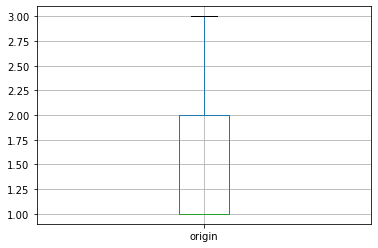

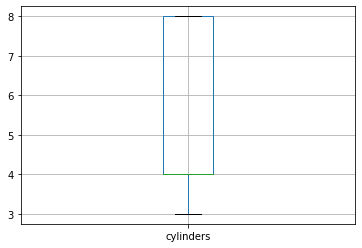

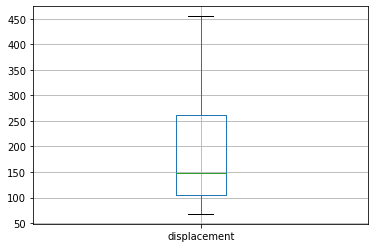

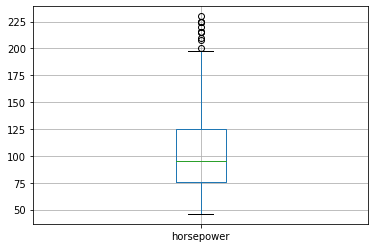

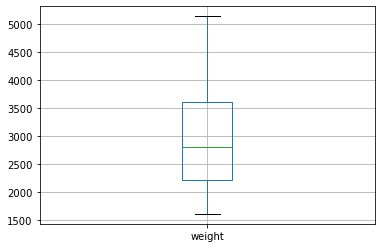

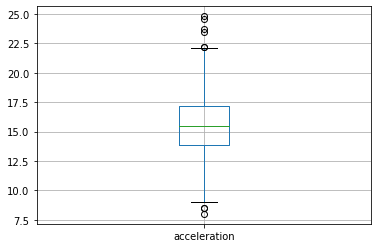

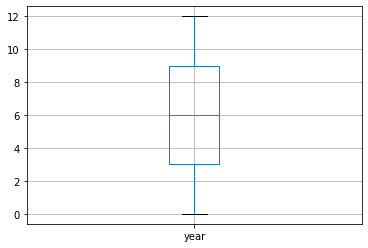

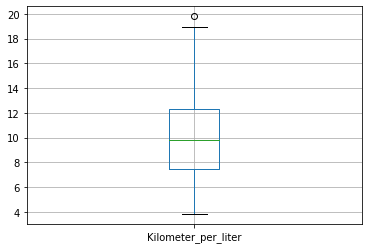

In [22]:
#To check for outliers, we can plot boxplot
for i in df.columns:
    df.boxplot(column = i)
    plt.show()

# <font size = 3 color='Black'><b>2). Every Independent Variable should have linear relationship with Dependent Variable</b>

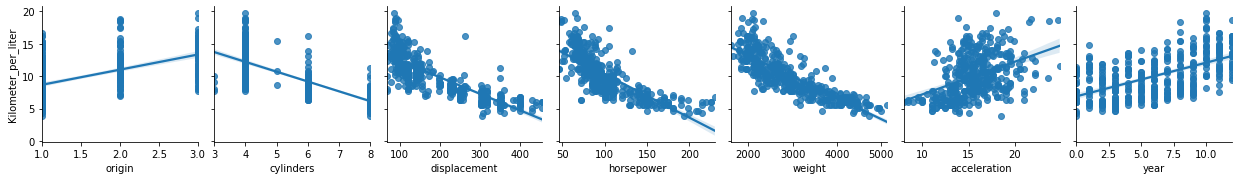

In [23]:
#We only check for linear relationship for continuous variables
sns.pairplot(df,x_vars= df.columns[:-1],y_vars=df.columns[-1],diag_kind =None,kind ='reg')
plt.show()

# <font size = 3 color='Black'><b>3). No Multicollinearity in Independent Var</b>

In [24]:
#moving independent variables in x and dependent variables in y
x = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [25]:
#method 1 -> using correlation matrix
corr = x.corr(method = 'pearson')
corr

,origin,cylinders,displacement,horsepower,weight,acceleration,year
origin,1.000000,-0.562543,-0.609409,-0.453669,-0.581024,0.205873,0.180662
cylinders,-0.562543,1.000000,0.950721,0.838939,0.896017,-0.505419,-0.348746
displacement,-0.609409,0.950721,1.000000,0.893646,0.932824,-0.543684,-0.370164
horsepower,-0.453669,0.838939,0.893646,1.000000,0.860574,-0.684259,-0.411651
weight,-0.581024,0.896017,0.932824,0.860574,1.000000,-0.417457,-0.306564
acceleration,0.205873,-0.505419,-0.543684,-0.684259,-0.417457,1.000000,0.288137
year,0.180662,-0.348746,-0.370164,-0.411651,-0.306564,0.288137,1.000000


In [26]:
#creating object of StandarScaler just to check vif of scaled data as well
scale = StandardScaler()
do = scale.fit_transform(df.iloc[:,:-1])
#to create dataframe of scaled data
da = pd.DataFrame(do, columns=x.columns)
da.head()

,origin,cylinders,displacement,horsepower,weight,acceleration,year
0,-0.715145,1.498191,1.090604,0.669196,0.630870,-1.295498,-1.627426
1,-0.715145,1.498191,1.503514,1.586599,0.854333,-1.477038,-1.627426
2,-0.715145,1.498191,1.196232,1.193426,0.550470,-1.658577,-1.627426
3,-0.715145,1.498191,1.061796,1.193426,0.546923,-1.295498,-1.627426
4,-0.715145,1.498191,1.042591,0.931311,0.565841,-1.840117,-1.627426


In [27]:
#method 2 -> Using VIF(variance inflation factor)
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
#creating new DF to store vif value for all columns
vif_df = pd.DataFrame()
vif_df['Features'] = x.columns
# using list comprehension to calc vif of each IV
vif_df['VIF']= [vif(da.values,i) for i in range(da.shape[1])]
vif_df['VIF_unscaled']= [vif(x.values,i) for i in range(x.shape[1])]
vif_df

,Features,VIF,VIF_unscaled
0,origin,1.734665,7.786877
1,cylinders,10.695947,106.515298
2,displacement,21.800494,90.953812
3,horsepower,9.018033,53.216967
4,weight,10.506049,139.034905
5,acceleration,2.506280,32.446043
6,year,1.239170,4.270990


# <font size = 2 color='Black'><b>Note: Standardization can reduce the values of VIF but can never reduce collinearity</b>

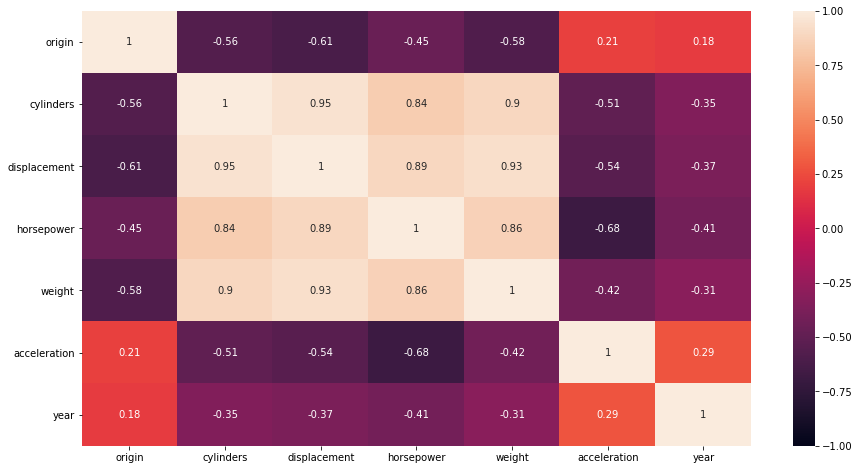

In [28]:
#method 3 -> using heatmap to visulaize collinearity among IV
plt.figure(figsize=(15,8))
sns.heatmap(corr,vmax = 1.0,vmin = -1.0,annot = True)
plt.show()

From all three methods used above, we can conclude that displacement has very high VIF value and has high multi collinearity with most of the IV

# <font size = 3 color='Black'><b>4). Dependent Variable should follow approximate Normal Distribution</b>

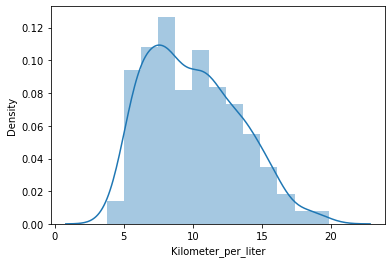

In [29]:
#we can check for ND by plotting distplot
sns.distplot(y,hist=True)
plt.show()

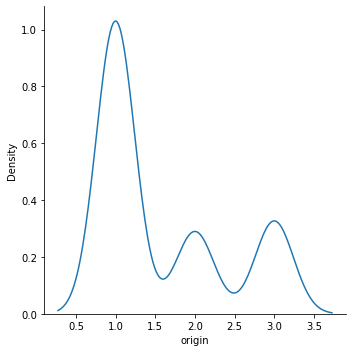

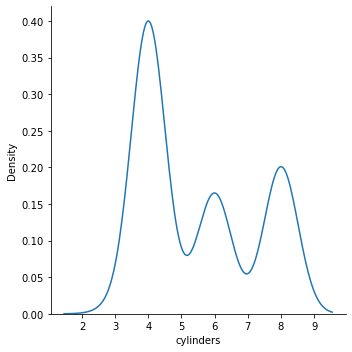

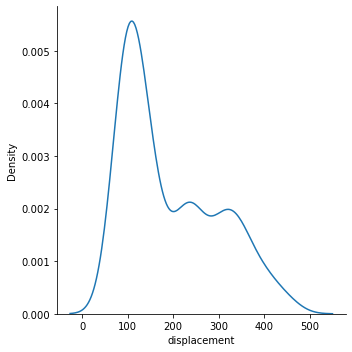

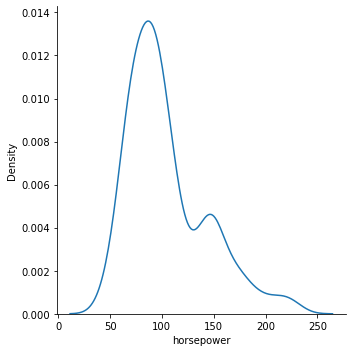

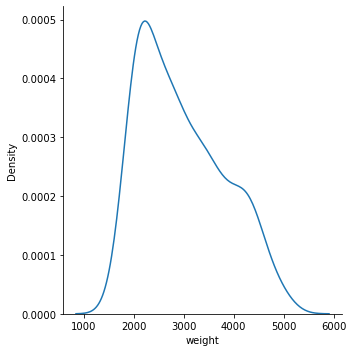

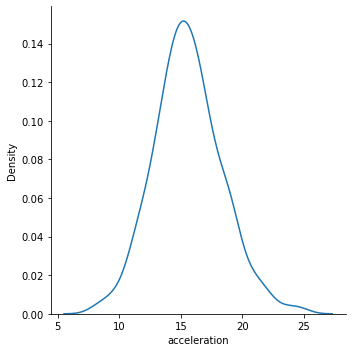

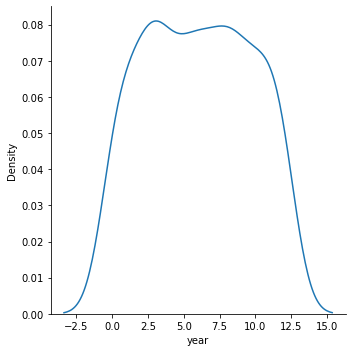

In [30]:
#We can also check if all the IV are also following approximate ND
for i in x.columns:
    sns.displot(df[i],kind='kde')
    plt.show
    

We can calculate skewness for all the IV and check for those var whose skewness is greater that 0.75 or lesser than -0.75

In [31]:
from scipy.stats import skew
#to calculate skewness for each IV
data_skew = x.apply(lambda i: skew(i))
#creating a list of var having skewness greater that 0.75 or lesser than -0.75
data_skewed = data_skew[(data_skew>0.75) | (data_skew< -0.75)]
output = list(zip(x.columns,data_skew))
output

[('origin', 0.9202910792259871),
 ('cylinders', 0.5249335774421718),
 ('displacement', 0.716930089340474),
 ('horsepower', 1.0914191838332945),
 ('weight', 0.5290589216608383),
 ('acceleration', 0.27772507624356363),
 ('year', 0.011491076335915352)]

# <font size = 2 color='Black'><b>Note: We only consider calculating skewness for continuous var(neither categorical nor discrete var)</b>

Therefore, we only perform log transform for 'horsepower' as its skewness is greater than 0.75

We do not do it for 'origin' as it is discrete variable

In [32]:
df['horsepower'] = np.log1p(df['horsepower'])

In [33]:
df.head()

,origin,cylinders,displacement,horsepower,weight,acceleration,year,Kilometer_per_liter
0,1,8,307.0,4.875197,3504,12.0,0,7.652587
1,1,8,350.0,5.111988,3693,11.5,0,6.377156
2,1,8,318.0,5.017280,3436,11.0,0,7.652587
3,1,8,304.0,5.017280,3433,12.0,0,6.802299
4,1,8,302.0,4.948760,3449,10.5,0,7.227443


In [34]:
#To check skewness after log transform
skew(df['horsepower'])

0.37077348668705024

### Creating x and y

In [35]:
#Using values function to pass data as array instead of DF as numpy arrays are quick to compute
x = df.values[:,:-1]
y = df.values[:,-1]

### Splitting the data into train and test set

In [36]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state = 10)

In [37]:
print("x_train:",x_train.shape)
print("x_test:",x_test.shape)
print("y_train:",y_train.shape)
print("y_test:",y_test.shape)

x_train: (318, 7)
x_test: (80, 7)
y_train: (318,)
y_test: (80,)


### Scaling the data

In [38]:
scaler = StandardScaler()
#X = scaler.fit_transform(X)
#sepatate function for fit and transform
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

### Building Linear Regression Model

In [39]:
#training the model
lr = LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [40]:
#Looking for coefficients value of output equation
Coefficients = list(zip(df.columns[:-1],lr.coef_))
print(Coefficients)
print(lr.intercept_)

[('origin', 0.5090449950484864), ('cylinders', -0.31911310864567777), ('displacement', 0.8939418525292804), ('horsepower', -1.1720250678090245), ('weight', -1.788447472804048), ('acceleration', -0.2494580978127073), ('year', 1.136503596678107)]
10.046894487319985


In [41]:
#Predicting values
y_pred = lr.predict(x_test)

### Evaluation of model

In [42]:
r2 = r2_score(y_test, y_pred)
print("R-squared : ", r2,'\n')

adjusted_r_squared = 1 - (1-r2)*(len(y)-1)/(len(y)-x.shape[1]-1)
print("Adjusted R-Square : ",adjusted_r_squared)

rmse=np.sqrt(mean_squared_error(y_test,y_pred))
print("Root Mean Squared Error (RMSE) : ",rmse,'\n')

print("Y_test min : ", y_test.min(),'\n')
print("Y_test max : ", y_test.max(),'\n')
# RMSE to be compared with Y min


R-squared :  0.8017805959577068 

Adjusted R-Square :  0.7982228117825887
Root Mean Squared Error (RMSE) :  1.480215058970644 

Y_test min :  4.2514370743027206 

Y_test max :  18.961409351390135 



### Fine Tuning the model

#### 1.) Using Regularization Techniques

Using Ridge Regression:

In [43]:
ridge = Ridge()
ridge.fit(x_train,y_train)
y_ridge = ridge.predict(x_test)

In [44]:
r2 = r2_score(y_test, y_ridge)
print("R-squared : ", r2,'\n')

adjusted_r_squared = 1 - (1-r2)*(len(y)-1)/(len(y)-x.shape[1]-1)
print("Adjusted R-Square : ",adjusted_r_squared)

rmse=np.sqrt(mean_squared_error(y_test,y_ridge))
print("Root Mean Squared Error (RMSE) : ",rmse,'\n')

print("Y_test min : ", y_test.min(),'\n')
print("Y_test max : ", y_test.max(),'\n')
# RMSE to be compared with Y min


R-squared :  0.802078634683044 

Adjusted R-Square :  0.7985261999209448
Root Mean Squared Error (RMSE) :  1.4791018294997855 

Y_test min :  4.2514370743027206 

Y_test max :  18.961409351390135 



As we can see, adjusted R-square value and RMSE has improved a little bit

Using Lasso Regression

In [45]:
lasso = Lasso()
lasso.fit(x_train,y_train)
y_lasso = lasso.predict(x_test)

In [46]:
r2 = r2_score(y_test, y_lasso)
print("R-squared : ", r2,'\n')

adjusted_r_squared = 1 - (1-r2)*(len(y)-1)/(len(y)-x.shape[1]-1)
print("Adjusted R-Square : ",adjusted_r_squared)

rmse=np.sqrt(mean_squared_error(y_test,y_lasso))
print("Root Mean Squared Error (RMSE) : ",rmse,'\n')

print("Y_test min : ", y_test.min(),'\n')
print("Y_test max : ", y_test.max(),'\n')
# RMSE to be compared with Y min


R-squared :  0.6528129781208436 

Adjusted R-Square :  0.6465814161896792
Root Mean Squared Error (RMSE) :  1.958995671618644 

Y_test min :  4.2514370743027206 

Y_test max :  18.961409351390135 



As we can see, Lasso is reducing r squared value and increasing RMSE

### Using OLS for Regression

In [47]:
#creating new dataframe from x_train,y_train to pass into ols
new_df = pd.DataFrame(x_train,columns = df.columns[:-1])
new_df['Kilometer_per_liter'] = y_train
new_df.head()

,origin,cylinders,displacement,horsepower,weight,acceleration,year,Kilometer_per_liter
0,1.786513,-0.839481,-1.038801,-1.187302,-1.129758,1.282248,0.799031,13.519570
1,1.786513,-0.839481,-1.038801,-1.187302,-1.182677,1.353396,1.343125,15.730317
2,1.786513,-0.839481,-0.704619,-0.031298,-0.578225,-0.211881,-0.561204,10.203449
3,-0.710679,0.339128,0.536628,-0.312997,0.047394,0.321737,-0.833251,7.652587
4,0.537917,-0.839481,-0.991061,-0.973756,-1.227364,-0.567626,-0.289157,12.329168


In [48]:
import statsmodels.formula.api as sm
model = sm.ols(formula = 'Kilometer_per_liter ~ origin+cylinders+displacement+horsepower+weight+acceleration+year',data = new_df).fit()

In [49]:
print(model.params)

Intercept       10.046894
origin           0.509045
cylinders       -0.319113
displacement     0.893942
horsepower      -1.172025
weight          -1.788447
acceleration    -0.249458
year             1.136504
dtype: float64


In [50]:
print(model.summary())

                             OLS Regression Results                            
Dep. Variable:     Kilometer_per_liter   R-squared:                       0.840
Model:                             OLS   Adj. R-squared:                  0.836
Method:                  Least Squares   F-statistic:                     231.9
Date:                 Mon, 24 May 2021   Prob (F-statistic):          3.56e-119
Time:                         02:34:11   Log-Likelihood:                -541.31
No. Observations:                  318   AIC:                             1099.
Df Residuals:                      310   BIC:                             1129.
Df Model:                            7                                         
Covariance Type:             nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       10.0469      0.075    

Note : R-squared values shown in above summary is for training set

In [53]:
x_test = pd.DataFrame(x_test,columns = df.columns[:-1])
y_ols = model.predict(x_test)

In [54]:
r2 = r2_score(y_test, y_ols)
print("R-squared : ", r2,'\n')

adjusted_r_squared = 1 - (1-r2)*(len(y)-1)/(len(y)-x.shape[1]-1)
print("Adjusted R-Square : ",adjusted_r_squared)

rmse=np.sqrt(mean_squared_error(y_test,y_ols))
print("Root Mean Squared Error (RMSE) : ",rmse,'\n')

print("Y_test min : ", y_test.min(),'\n')
print("Y_test max : ", y_test.max(),'\n')
# RMSE to be compared with Y min

R-squared :  0.8017805959577073 

Adjusted R-Square :  0.7982228117825892
Root Mean Squared Error (RMSE) :  1.480215058970642 

Y_test min :  4.2514370743027206 

Y_test max :  18.961409351390135 



### Using SGD Regressor

In [59]:
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

In [60]:
from sklearn.linear_model import SGDRegressor
lsgd = SGDRegressor(learning_rate="constant",  #want to use a constant learning rate
                  eta0=0.01,  #alpha
                  shuffle=True, #while going ahead with the next epoch shuffle the obs
                  random_state=10, #set seed
                  max_iter=1000, #max no of epochs
                  early_stopping=True, #stop if zero convergence is reached first
                  n_iter_no_change=5) #no of obs to wait for before concluding upon early stopping
lsgd.fit(x_train,y_train)

SGDRegressor(early_stopping=True, learning_rate='constant', random_state=10)

In [61]:
lsgd.n_iter_
to check how many iteration has been performed
# 1 epoch 318 iteration 
# So 17 epoch = 5406 iterations

17

In [62]:
lsgd.t_
# The equation was made and fetched in this iteration

5407.0

In [65]:
y_sgd = lsgd.predict(x_test)

In [66]:
r2 = r2_score(y_test, y_sgd)
print("R-squared : ", r2,'\n')

adjusted_r_squared = 1 - (1-r2)*(len(y)-1)/(len(y)-x.shape[1]-1)
print("Adjusted R-Square : ",adjusted_r_squared)

rmse=np.sqrt(mean_squared_error(y_test,y_sgd))
print("Root Mean Squared Error (RMSE) : ",rmse,'\n')

print("Y_test min : ", y_test.min(),'\n')
print("Y_test max : ", y_test.max(),'\n')
# RMSE to be compared with Y min

R-squared :  0.804583442697768 

Adjusted R-Square :  0.8010759660282408
Root Mean Squared Error (RMSE) :  1.4697125887885276 

Y_test min :  4.2514370743027206 

Y_test max :  18.961409351390135 



As we can see, adjusted r squared value has increased with a significant amount for SGD regression and RMSE has also reduced 

# <font size = 5 color='Black'><b>Therefore, we can conclude that the best model is the one built using SGD Regressor<b> 